In [1]:
import pandas as pd
import pickle
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
with open('rf.pkl', 'rb') as f:
    clf = pickle.load(f)

In [3]:
test_df = pd.read_csv('../processed_data/test.csv')
test_df = test_df.drop(['State_AL', 'State_NC', 'isNaN_rep_income', 'State_FL', 'State_LA',
       'isNaN_uti_card_50plus_pct', 'State_SC', 'State_GA', 'State_MS',
       'auto_open_36_month_num', 'card_open_36_month_num', 'ind_acc_XYZ'], axis=1)
X = test_df.drop('Default_ind', axis=1).values
y = test_df['Default_ind'].values

In [4]:
y_pred = clf.predict(X)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


In [5]:
metrics.accuracy_score(y, y_pred)

0.9008

In [6]:
metrics.f1_score(y, y_pred)

0.4745762711864407

In [7]:
clf.feature_importances_

array([0.04776039, 0.16651047, 0.02010684, 0.02069301, 0.01954001,
       0.10702207, 0.03574504, 0.08636967, 0.10840184, 0.05133435,
       0.0770793 , 0.07185067, 0.03824752, 0.06748653, 0.06241157,
       0.01546104, 0.00397967])

In [8]:
cols = test_df.drop('Default_ind', axis=1).columns
importance = clf.feature_importances_

In [9]:
feat_importances = pd.Series(importance, index=cols).sort_values()

<AxesSubplot:>

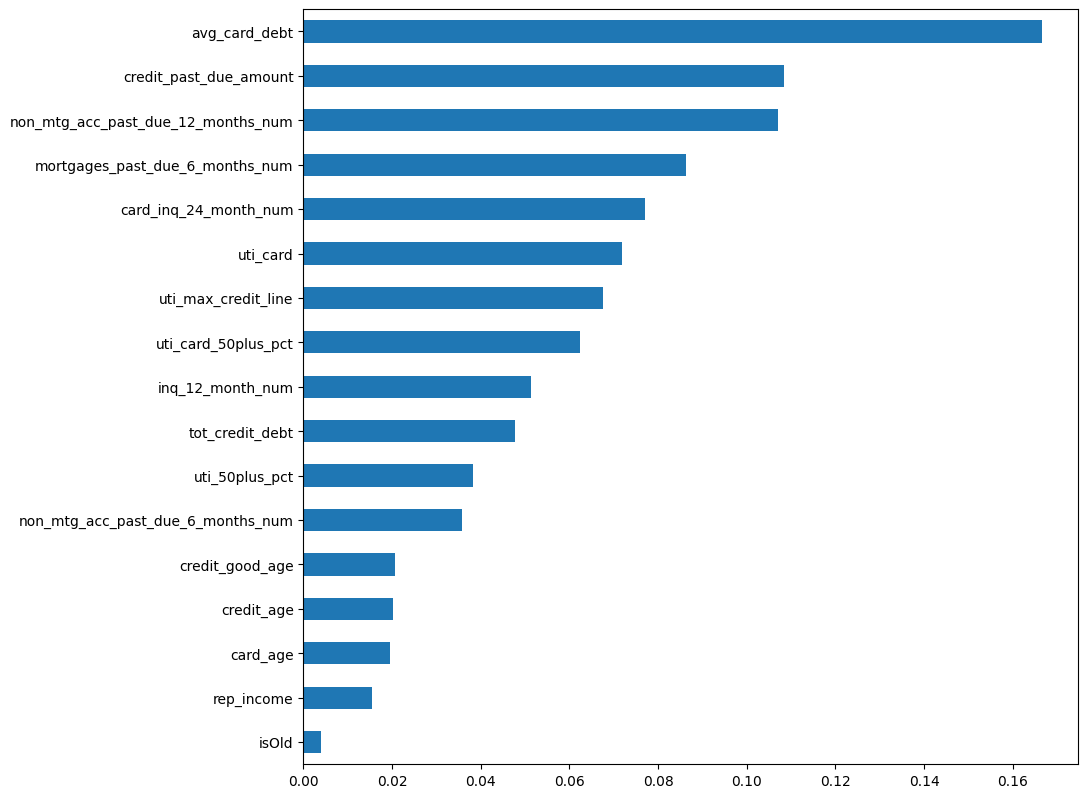

In [10]:
plt.figure(figsize=(10,10), dpi=100)
feat_importances.plot(kind='barh')

In [11]:
feat_importances[:13].index

Index(['isOld', 'rep_income', 'card_age', 'credit_age', 'credit_good_age',
       'non_mtg_acc_past_due_6_months_num', 'uti_50plus_pct',
       'tot_credit_debt', 'inq_12_month_num', 'uti_card_50plus_pct',
       'uti_max_credit_line', 'uti_card', 'card_inq_24_month_num'],
      dtype='object')